In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score    


In [2]:
Total_datas_subtr = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/Total_datas_subtr.csv',names=['a-b','c-d'])
Total_datas = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/Total_datas.csv')
Total_labels = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/Total_labels.csv')

In [60]:
datas_0 = Total_datas_subtr[0:55899]
datas_1 = Total_datas_subtr[55900:134999]
datas_2 = Total_datas_subtr[135000:232899]
datas_3 = Total_datas_subtr[232900:373396]
len(datas_0), len(datas_1), len(datas_2), len(datas_3)
datas = pd.concat([datas_0,datas_1,datas_2,datas_3])
datas[134997:135003]
len(datas)


373393

In [61]:
labels = Total_labels
labels[0:55899] = 0
labels[55899:134998] = 1
labels[134998:232897] = 2
labels[232897:373396] = 3
len(labels)


373399

In [ ]:
datas.to_csv("C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/merge_datas.csv", mode='a', header=False, index=False)
labels.to_csv("C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/merge_labels.csv", mode='a', header=False, index=False)

# 저장될때 label이 373396까지 저장되어야하는데 373399까지 되는 거 같음. 나머지 7,8,9 는 삭제


In [12]:
Total_datas_new = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/merge_datas_confirm.csv')
Total_labels_new = pd.read_csv('C:/Users/hml76/OneDrive/바탕 화면/Capacitive_sensor_research/실험데이터/merge_labels_confirm.csv')
len(Total_datas_new), len(Total_labels_new)

(373395, 373395)

In [4]:
import pandas as pd
 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(Total_datas_new, Total_labels_new, test_size=0.3)#, random_state=42)
print("Training RandomForest ...")

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest.fit(X_train, y_train)

Training RandomForest ...


C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [5]:
y_pred = forest.predict(X_test)

print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.40875208669957774


C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\hml76\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


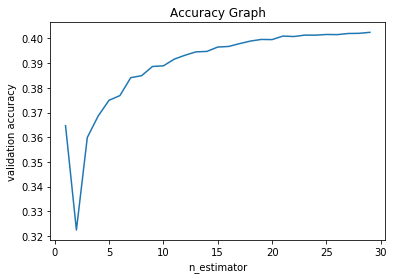

In [65]:
import matplotlib.pyplot as plt

n_estimators = range(1,30) #29개 여야만 함. accuracy 크기가 29
accuracies1=[]

for i in n_estimators:
    forest = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=0)
    forest.fit(X_train,y_train)
    accuracies1.append(forest.score(X_test,y_test))

plt.plot(n_estimators, accuracies1)
plt.xlabel("n_estimator")
plt.ylabel("validation accuracy")
plt.title("Accuracy Graph")
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Total_datas_new, Total_labels_new, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [14]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.997
테스트 세트 정확도: 0.362


In [15]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.478
테스트 세트 정확도: 0.476


In [16]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.453
테스트 세트 정확도: 0.452


In [17]:
tree = DecisionTreeClassifier(max_depth=12, random_state=0)
clf=tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.493
테스트 세트 정확도: 0.477


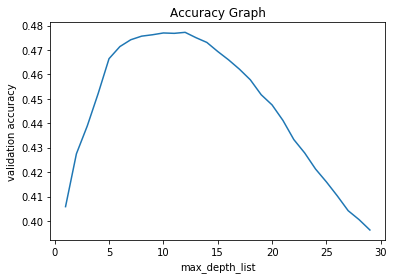

In [77]:
import matplotlib.pyplot as plt

max_depth_list = range(1,30)
accuracies=[]

for i in max_depth_list:
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train,y_train)
    accuracies.append(tree.score(X_test,y_test))

plt.plot(max_depth_list, accuracies)
plt.xlabel("max_depth_list")
plt.ylabel("validation accuracy")
plt.title("Accuracy Graph")
plt.show()